<style>
    *{
        font-size: 14px;
    }

    h1{
        font-size: 24px;
        text-align: center;
        font-weight: bold;
    }

    h2{
        font-size: 16px;
        display: inline-block;
        
    }


    span{
        font-style: oblique;
    }
    
    a{
        text-decoration: underline;
    }
</style>

<p><h2>1.</h2> <a href="https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality">https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality</a> - выбранный датасет.</p>


Импортируем необходимые библиотеки и выведем первые строки, чтобы проверить, что все работает.

In [1]:
import numpy as np
import pandas as pd 
from feature_engine.outliers import OutlierTrimmer
import plotly.express as px

df = pd.read_csv('apple_quality.csv') 

print(df.head()) 

   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0     0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1     1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2     2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3     3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4     4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

    Acidity Quality  
0 -0.491590    good  
1 -0.722809    good  
2  2.621636     bad  
3  0.790723    good  
4  0.501984    good  


<style>
    *{
        font-size: 14px;
    }

    h1{
        font-size: 24px;
        text-align: center;
        font-weight: bold;
    }

    h2{
        font-size: 16px;
        display: inline-block;
        
    }


    span{
        font-style: oblique;
    }
    
    a{
        text-decoration: underline;
    }
</style>

<p><h2>2.</h2> Немного обработаем исходный датасет, чтобы он лучше подходил под задачу кластеризации - отбросим выходные атрибуты "Quality" и "A_id", а также добавим к датасету новый атрибут - соотношение веса к размеру. Формула: <span>weight_to_size_ratio = weight / size </span> </p>

In [2]:
data = df.drop([df.columns[0], df.columns[-1]], axis=1)
data['Weight_to_Size_ratio'] = data['Weight']/data['Size']
print(data.head())

       Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness   Acidity  \
0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840 -0.491590   
1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530 -0.722809   
2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033  2.621636   
3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761  0.790723   
4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849  0.501984   

   Weight_to_Size_ratio  
0              0.632823  
1              2.375515  
2              4.627300  
3              3.456545  
4             -0.950444  


Еще раз проверим, есть ли пропущенные значения в датасете.

In [3]:
print(data.isnull().sum())

Size                    0
Weight                  0
Sweetness               0
Crunchiness             0
Juiciness               0
Ripeness                0
Acidity                 0
Weight_to_Size_ratio    0
dtype: int64


Выведем диаграмму размахов и посмотрим, есть ли выбросы

In [4]:
for feature in data.columns:
    fig=px.box(data,y=feature,title="<b>"+feature,boxmode="group", template="plotly_dark",points="all")
    fig.update_layout(title_x=0.5,title_font_size=30,font_size=15,font_color="violet")
    fig.show()


Используем библиотеку feture_engine и метод межквартильного размаха для обработки выбросов

In [5]:
columns = data.describe().columns.tolist()
capper = OutlierTrimmer(capping_method='iqr', tail='both', fold=1.5, variables=columns)
dataCopy = data.copy()
capper.fit(dataCopy)

OutlierTrimmer(capping_method='iqr', fold=1.5, tail='both',
               variables=['Size', 'Weight', 'Sweetness', 'Crunchiness',
                          'Juiciness', 'Ripeness', 'Acidity',
                          'Weight_to_Size_ratio'])

Определяем границы

In [6]:
print(capper.right_tail_caps_)
print(capper.left_tail_caps_)

{'Size': 4.73896291425, 'Weight': 3.0950965391249996, 'Sweetness': 4.61244239625, 'Crunchiness': 4.641438949625, 'Juiciness': 5.791869691624999, 'Ripeness': 5.573044401624999, 'Acidity': 5.84236800775, 'Weight_to_Size_ratio': 3.734083295812221}
{'Size': -5.75020099175, 'Weight': -5.075890391874999, 'Sweetness': -5.54894553775, 'Crunchiness': -2.6844403373750003, 'Juiciness': -4.7571791193749995, 'Ripeness': -4.578509627375, 'Acidity': -5.7092993302499995, 'Weight_to_Size_ratio': -3.7295285696775573}


Удаляем выбросы и снова выводим диаграмму

In [7]:
dataCopy = capper.transform(dataCopy)

for feature in dataCopy.columns:
    fig=px.box(dataCopy,y=feature,title="<b>"+feature,boxmode="group", template="plotly_dark",points="all")
    fig.update_layout(title_x=0.5,title_font_size=30,font_size=15,font_color="violet")
    fig.show()

<style>
    *{
        font-size: 14px;
    }

    h1{
        font-size: 24px;
        text-align: center;
        font-weight: bold;
    }

    h2{
        font-size: 16px;
        display: inline-block;
        
    }


    span{
        font-style: oblique;
    }
    
    a{
        text-decoration: underline;
    }
</style>

<h2>3.Определим количество кластеров с помощью метода локтя</h2>


WCSS - сумма квадратов внутрикластерных расстояний

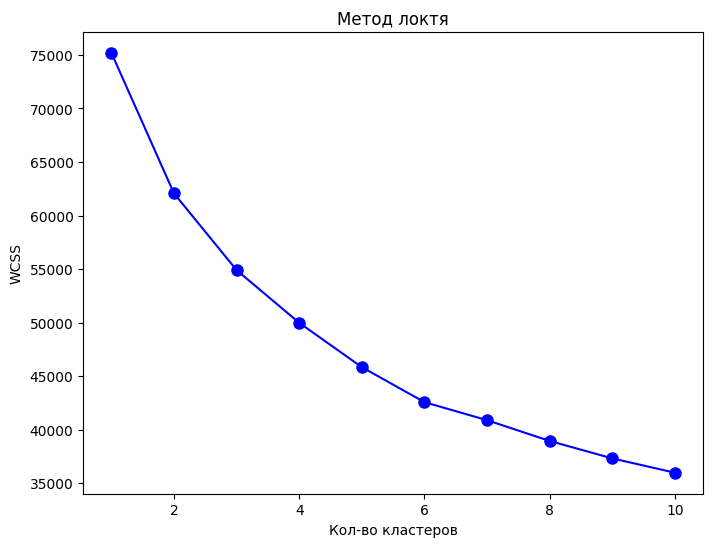

In [8]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 

X =dataCopy.values[:]
wcss = [] 
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.subplots(figsize=(8, 6))
plt.plot(range(1,11), wcss, 'bo-', markersize=8)
plt.title('Метод локтя')
plt.xlabel('Кол-во кластеров')
plt.ylabel('WCSS')
plt.show()

По графику не очень очевидно, но кажется, что точка изгиба приходится на 2 кластерах

In [9]:
clustersQuantity = 2 
k_means =KMeans(init='k-means++', n_clusters=clustersQuantity, n_init=12)
k_means.fit(X)
labels = k_means.labels_
dataCopy['cluster'] = labels
print(dataCopy.head())


       Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness   Acidity  \
1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530 -0.722809   
3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761  0.790723   
4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849  0.501984   
5 -3.425400 -1.409082  -1.913511    -0.555775  -3.853071  1.914616 -2.981523   
6  1.331606  1.635956   0.875974    -1.677798   3.106344 -1.847417  2.414171   

   Weight_to_Size_ratio  cluster  
1              2.375515        1  
3              3.456545        1  
4             -0.950444        0  
5              0.411363        1  
6              1.228559        0  


Text(0, 0.5, 'Acidity')

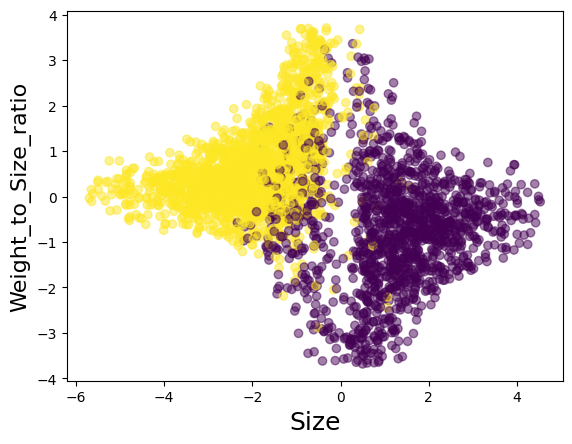

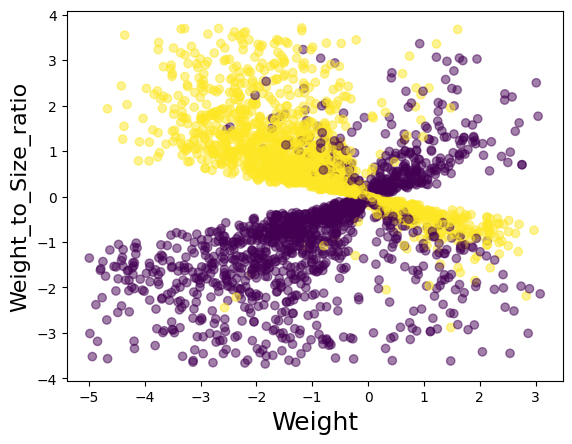

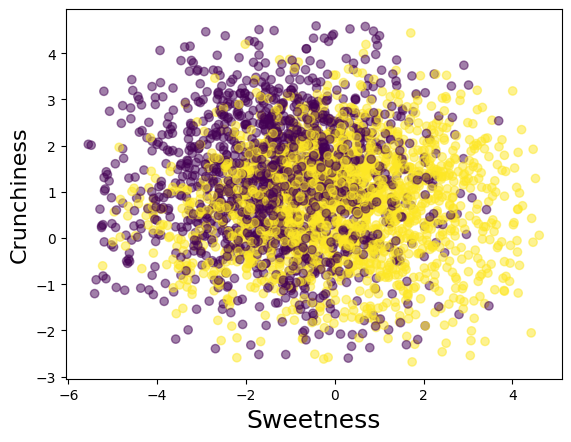

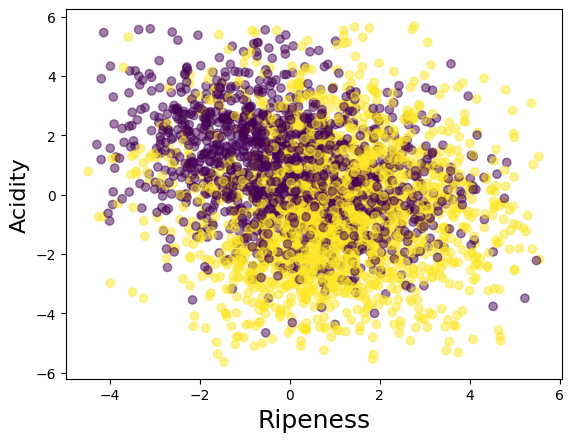

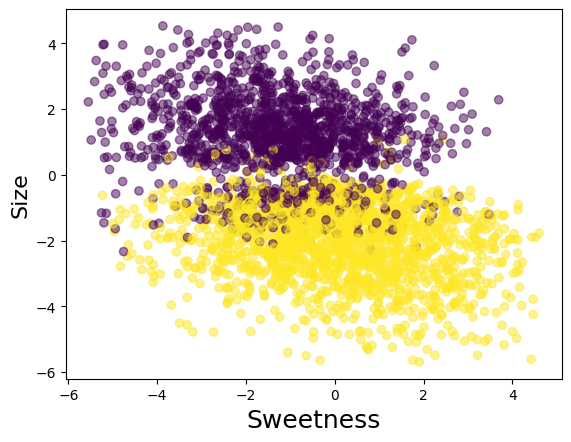

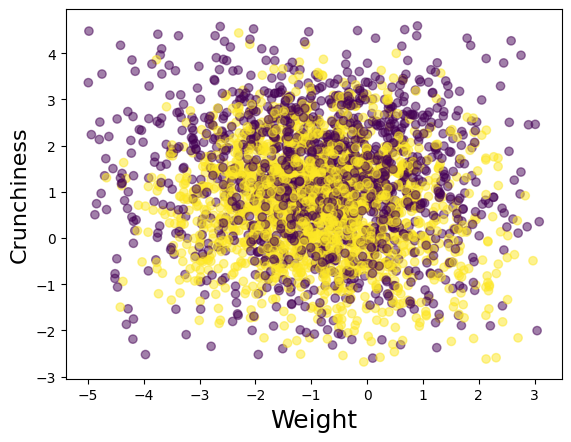

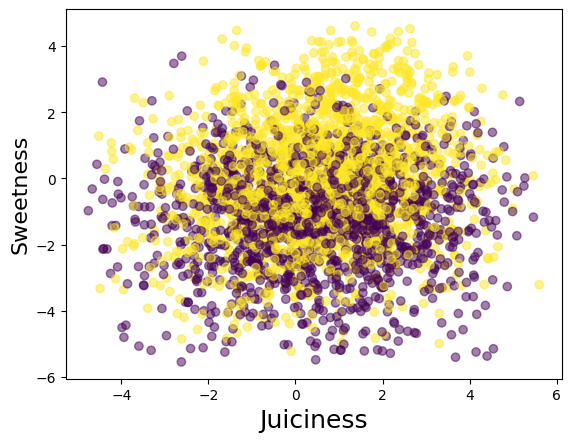

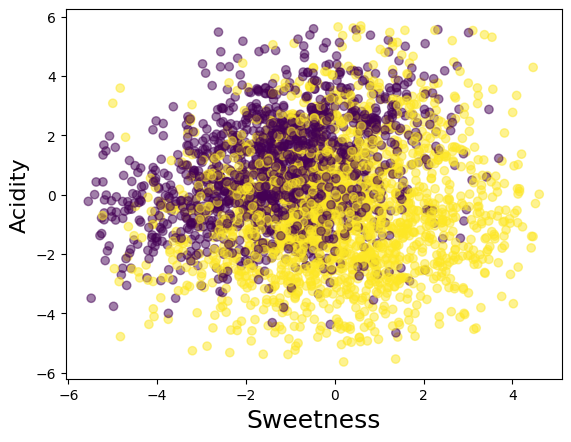

In [10]:

plt.figure()
plt.scatter(dataCopy["Size"], dataCopy["Weight_to_Size_ratio"], c=labels.astype(float), alpha=.5)
plt.xlabel('Size', fontsize=18)
plt.ylabel('Weight_to_Size_ratio', fontsize=16)
 
plt.figure()
plt.scatter(dataCopy["Weight"], dataCopy["Weight_to_Size_ratio"], c=labels.astype(float), alpha=.5)
plt.xlabel('Weight', fontsize=18)
plt.ylabel('Weight_to_Size_ratio', fontsize=16)

plt.figure()
plt.scatter(dataCopy["Sweetness"], dataCopy["Crunchiness"], c=labels.astype(float), alpha=.5)
plt.xlabel('Sweetness', fontsize=18)
plt.ylabel('Crunchiness', fontsize=16)

plt.figure()
plt.scatter(dataCopy["Ripeness"], dataCopy["Acidity"], c=labels.astype(float), alpha=.5)
plt.xlabel('Ripeness', fontsize=18)
plt.ylabel('Acidity', fontsize=16)

plt.figure()
plt.scatter(dataCopy["Sweetness"], dataCopy["Size"], c=labels.astype(float), alpha=.5)
plt.xlabel('Sweetness', fontsize=18)
plt.ylabel('Size', fontsize=16)

plt.figure()
plt.scatter(dataCopy["Weight"], dataCopy["Crunchiness"], c=labels.astype(float), alpha=.5)
plt.xlabel('Weight', fontsize=18)
plt.ylabel('Crunchiness', fontsize=16)

plt.figure()
plt.scatter(dataCopy["Juiciness"], dataCopy["Sweetness"], c=labels.astype(float), alpha=.5)
plt.xlabel('Juiciness', fontsize=18)
plt.ylabel('Sweetness', fontsize=16)

plt.figure()
plt.scatter(dataCopy["Sweetness"], dataCopy["Acidity"], c=labels.astype(float), alpha=.5)
plt.xlabel('Sweetness', fontsize=18)
plt.ylabel('Acidity', fontsize=16)

<style>
    *{
        font-size: 14px;
    }

    h1{
        font-size: 24px;
        text-align: center;
        font-weight: bold;
    }

    h2{
        font-size: 16px;
        display: inline-block;
        
    }


    span{
        font-style: oblique;
    }
    
    a{
        text-decoration: underline;
    }
</style>

<p><h2>Вывод:</h2> построив несколько графиков, можем заметить, что помимо зависимости, которую мы добавили ранее, на графике зависимости между весом и сладостью яблока видим, что более сладкие яблоки те, что имеют меньший размер, при этом яблоки большего размера обычно менее сладкие. Остальные графики не показали каких-то особых разделений, так как данные в датасете, в большинстве своем, являются независимыми. Сам по себе датасет показал, что многие данные не обладают связями между собой</p>
